## **TUGAS**
*Nama  :* Reynaldi Fakrhi Pratama<br>
*Kelas :* TI-3A/27<br>
*NIM   :* 2041720209<br>

## Tugas 
proses classification learning Decision Tree dengan ketentuan,

1. Menggunakan data `mushrooms.csv`
2. Evaluasi hasilnya

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("./mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
# Preprocessing
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)
    print(mappings)

[{0: 0, 1: 1}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, {0: 0, 1: 1}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, {0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}, {0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}, {0: 0, 1: 1}]
[{0: 0, 1: 1}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}, {0: 0, 1: 1, 2: 2, 3: 3}, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6,

In [8]:
y = data['class']
X = data.drop('class', axis=1)

In [9]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(X)

      cap-shape  cap-surface  cap-color   bruises      odor  gill-attachment  \
0      1.029712     0.140128  -0.198250  1.185917  0.881938         0.162896   
1      1.029712     0.140128   1.765874  1.185917 -1.970316         0.162896   
2     -2.087047     0.140128   1.373049  1.185917 -0.544189         0.162896   
3      1.029712     0.953270   1.373049  1.185917  0.881938         0.162896   
4      1.029712     0.140128  -0.591075 -0.843230  0.406562         0.162896   
...         ...          ...        ...       ...       ...              ...   
8119  -0.216992     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8120   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8121  -0.840343     0.140128  -0.198250 -0.843230  0.406562        -6.138869   
8122  -0.216992     0.953270  -0.198250 -0.843230  1.832689         0.162896   
8123   1.029712     0.140128  -0.198250 -0.843230  0.406562        -6.138869   

      gill-spacing  gill-size  gill-col

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
#Training proses
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, random_state=2)
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2)

In [12]:
#Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [13]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [15]:
#Training
np.sum(y) / len(y)

0.48202855736090594

In [16]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [17]:
from sklearn.metrics import accuracy_score

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)

In [18]:
print(f"Logistic Regression : {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test, y_test)}")
print(f"Neural Network : {nn_model.score(X_test, y_test)}")
print("Metrics Acc : {:.2f}".format(acc))

Logistic Regression : 0.9624615384615385
Support Vector Machine : 1.0
Neural Network : 1.0
Metrics Acc : 1.00


<AxesSubplot:>

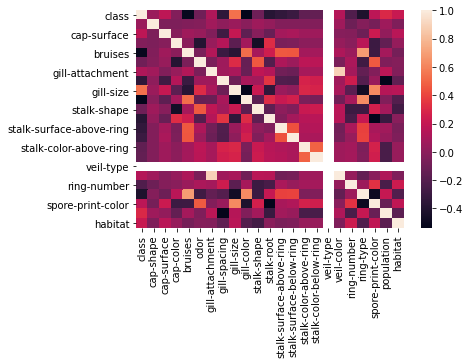

In [19]:
X_test.shape

corr = data.corr()

sns.heatmap(corr)